### Data Preparation

In [1]:
#Importing libraries
import nltk, re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from collections import Counter
import progressbar

In [2]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [3]:
# total words in the corpus.
print(len(nltk_data))

3914


In [4]:
nltk_data[:20]

[[('Pierre', 'NOUN'),
  ('Vinken', 'NOUN'),
  (',', '.'),
  ('61', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  (',', '.'),
  ('will', 'VERB'),
  ('join', 'VERB'),
  ('the', 'DET'),
  ('board', 'NOUN'),
  ('as', 'ADP'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
  ('director', 'NOUN'),
  ('Nov.', 'NOUN'),
  ('29', 'NUM'),
  ('.', '.')],
 [('Mr.', 'NOUN'),
  ('Vinken', 'NOUN'),
  ('is', 'VERB'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Elsevier', 'NOUN'),
  ('N.V.', 'NOUN'),
  (',', '.'),
  ('the', 'DET'),
  ('Dutch', 'NOUN'),
  ('publishing', 'VERB'),
  ('group', 'NOUN'),
  ('.', '.')],
 [('Rudolph', 'NOUN'),
  ('Agnew', 'NOUN'),
  (',', '.'),
  ('55', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  ('and', 'CONJ'),
  ('former', 'ADJ'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Consolidated', 'NOUN'),
  ('Gold', 'NOUN'),
  ('Fields', 'NOUN'),
  ('PLC', 'NOUN'),
  (',', '.'),
  ('was', 'VERB'),
  ('named', 'VERB'),
  ('*-1', 'X'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
 

In the list mentioned above, each element of the list is a sentence. Also, note that each sentence ends with a full stop '.' whose POS tag is also a '.'. Thus, the POS tag '.' demarcates the end of a sentence.

Also, we do not need the corpus to be segmented into sentences, but can rather use a list of (word, tag) tuples. Let's convert the list into a (word, tag) tuple.

In [5]:
# Converting to list of (words, POS tags) tuple
tagged_words = [tup for sent in nltk_data for tup in sent]
print(len(tagged_words))
tagged_words[:15]

100676


[('Pierre', 'NOUN'),
 ('Vinken', 'NOUN'),
 (',', '.'),
 ('61', 'NUM'),
 ('years', 'NOUN'),
 ('old', 'ADJ'),
 (',', '.'),
 ('will', 'VERB'),
 ('join', 'VERB'),
 ('the', 'DET'),
 ('board', 'NOUN'),
 ('as', 'ADP'),
 ('a', 'DET'),
 ('nonexecutive', 'ADJ'),
 ('director', 'NOUN')]

As we can see, we have a 100676 tagged tuples.
 Let's now do some exploratory analyses.

# Exploartory Data Analysis

Let's now conduct some basic exploratory analysis to understand the tagged corpus. 

In [6]:
# unique POS tags in the corpus
tags = [pair [1] for pair in tagged_words]
unique_tags = set(tags)
len(unique_tags)

12

The corpus has 12 unique POS tags

In [7]:
unique_tags

{'.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X'}

In [8]:
# Frenquency of the elements in the list.
tag_count = Counter(tags)
tag_count

Counter({'NOUN': 28867,
         '.': 11715,
         'NUM': 3546,
         'ADJ': 6397,
         'VERB': 13564,
         'DET': 8725,
         'ADP': 9857,
         'CONJ': 2265,
         'X': 6613,
         'ADV': 3171,
         'PRT': 3219,
         'PRON': 2737})

In [9]:
# most common tag
tag_count.most_common(5)

[('NOUN', 28867), ('VERB', 13564), ('.', 11715), ('ADP', 9857), ('DET', 8725)]

Clearly, NOUN is most frequent tag followed by VERB, '.', ADP and DET. You can read the exhaustive list of tags using the NLTK documentation as shown below.

In [10]:
# list of POS tags in NLTK
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [11]:
# words with the tag "VBD" (verb, past tense) ending with 'ed'
past_tense_words = [pair for pair in tagged_words if pair[1] == "VERB"]
ends_with_ed = [pair for pair in past_tense_words if pair[0].endswith('ed')]
print(len(ends_with_ed)/len(past_tense_words))
ends_with_ed[:20]

0.20694485402536125


[('named', 'VERB'),
 ('used', 'VERB'),
 ('caused', 'VERB'),
 ('exposed', 'VERB'),
 ('reported', 'VERB'),
 ('stopped', 'VERB'),
 ('reported', 'VERB'),
 ('studied', 'VERB'),
 ('led', 'VERB'),
 ('used', 'VERB'),
 ('replaced', 'VERB'),
 ('worked', 'VERB'),
 ('died', 'VERB'),
 ('expected', 'VERB'),
 ('diagnosed', 'VERB'),
 ('expected', 'VERB'),
 ('studied', 'VERB'),
 ('industrialized', 'VERB'),
 ('owned', 'VERB'),
 ('industrialized', 'VERB')]

In [12]:
# words with the tag "VBG" end with "ing"
participle_verbs = [pair for pair in tagged_words if pair[1]=="VERB"]
ends_with_ing = [pair for pair in participle_verbs if pair[0].endswith("ing")]
print(len(ends_with_ing)/ len(participle_verbs))
ends_with_ing[:20]

0.10852255971689767


[('publishing', 'VERB'),
 ('causing', 'VERB'),
 ('using', 'VERB'),
 ('bring', 'VERB'),
 ('talking', 'VERB'),
 ('having', 'VERB'),
 ('making', 'VERB'),
 ('surviving', 'VERB'),
 ('including', 'VERB'),
 ('including', 'VERB'),
 ('according', 'VERB'),
 ('remaining', 'VERB'),
 ('according', 'VERB'),
 ('declining', 'VERB'),
 ('rising', 'VERB'),
 ('yielding', 'VERB'),
 ('waiving', 'VERB'),
 ('holding', 'VERB'),
 ('holding', 'VERB'),
 ('cutting', 'VERB')]

In [13]:
# fraction of adjectives that are followed by a noun
# list of all tags(without the words)
tags = [pair[1] for pair in tagged_words]

# list of ADJ tags
adj_tags = [tag for tag in tags if tag == "ADJ"]

# list of (ADJ, NOUN) tags 
adj_noun_tags = [(tag, tags[index+1]) for index, tag in enumerate(tags)
                if tag == "ADJ" and tags [index+1] == "NOUN"]

print(len(adj_tags))
print(len(adj_noun_tags))
print(len(adj_noun_tags)/len(adj_tags))

6397
4474
0.6993903392215101


As we can see, approx 70% Adjective tags are followed by Noun tags

In [14]:
# fraction of determiners that are followed by a noun
det_tags = [tag for tag in tags if tag == "DET"]
det_noun_tags = [(tag, tags[index+1]) for index, tag in enumerate(tags)
                if tag == "DET" and tags [index+1] == "NOUN"]

print(len(det_tags))
print(len(det_noun_tags))
print(len(det_noun_tags)/len(det_tags))

8725
5569
0.6382808022922636


Thus, approx 63% Determiner tags are followed by a Noun tag.

In [15]:
# checking modals tags (MD tags) 
md_tags = [tag for tag in tags if tag == "MD"]
print(len(md_tags))

0


There are no words with modal tags

In [16]:
# Splitting into Train and Test in the ratio 95:5.
random.seed(1234)
train_set, test_set = train_test_split(nltk_data,train_size = 0.95, test_size = 0.05, random_state = 101)
print(len(train_set))
print(len(test_set))
print(train_set[:2])

3718
196
[[('Reliance', 'NOUN'), ('confirmed', 'VERB'), ('the', 'DET'), ('filing', 'NOUN'), ('but', 'CONJ'), ('would', 'VERB'), ("n't", 'ADV'), ('elaborate', 'VERB'), ('.', '.')], [('*', 'X'), ('Encouraging', 'VERB'), ('long-term', 'ADJ'), ('investing', 'NOUN'), ('.', '.')]]


In [17]:
# First sentence in the train set
" ".join([word[0] for word in train_set[0]])

"Reliance confirmed the filing but would n't elaborate ."

In [18]:
# Second sentence in the train set
" ".join([word[0] for word in train_set[1]])

'* Encouraging long-term investing .'

In [19]:
# list of tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
test_tagged_words = [tup[0] for sent in test_set for tup in sent]
print(len(train_tagged_words))
print(len(test_tagged_words))

95547
5129


In [20]:
# Some words in the form (word, POS tag) in tagged words .
train_tagged_words[:10]

[('Reliance', 'NOUN'),
 ('confirmed', 'VERB'),
 ('the', 'DET'),
 ('filing', 'NOUN'),
 ('but', 'CONJ'),
 ('would', 'VERB'),
 ("n't", 'ADV'),
 ('elaborate', 'VERB'),
 ('.', '.'),
 ('*', 'X')]

In [21]:
# filtering tokens from the first sentence.
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]

['Reliance',
 'confirmed',
 'the',
 'filing',
 'but',
 'would',
 "n't",
 'elaborate',
 '.',
 '*']

In [22]:
# Total tokens
total_tokens = set(tokens)
print(len(total_tokens))

12100


In [23]:
# Total number of tags
total_tags = set([pair[1] for pair in train_tagged_words])
print(len(total_tags))
print(total_tags)

12
{'NOUN', 'X', 'CONJ', 'VERB', 'ADJ', 'NUM', 'PRT', '.', 'ADP', 'DET', 'PRON', 'ADV'}


# POS Tagging, HMMs, Viterbi

1. Tagged Treebank corpus is available (Sample data to training and test data set)
   * Basic text and structure exploration
2. Creating HMM model on the tagged data set.
   * Calculating Emission Probabaility: P(observation|state)
   * Calculating Transition Probability: P(state2|state1)
3. Developing algorithm for Viterbi Heuristic
4. Checking accuracy on the test data set

We'll use the HMM algorithm to tag the words. Given a sequence of words to be tagged, the task is to assign the most probable tag to the word.

In other words, to every word w, assign the tag t that maximises the likelihood P(t/w). Since P(t/w) = P(w/t). P(t) / P(w), after ignoring P(w), we have to compute P(w/t) and P(t).

P(w/t) is basically the probability that given a tag (say NN), what is the probability of it being w (say 'building'). This can be computed by computing the fraction of all NNs which are equal to w, i.e.

P(w/t) = count(w, t) / count(t).

The term P(t) is the probability of tag t, and in a tagging task, we assume that a tag will depend only on the previous tag. In other words, the probability of a tag being NN will depend only on the previous tag t(n-1). So for e.g. if t(n-1) is a JJ, then t(n) is likely to be an NN since adjectives often precede a noun (blue coat, tall building etc.).

Given the penn treebank tagged dataset, we can compute the two terms P(w/t) and P(t) and store them in two large matrices. The matrix of P(w/t) will be sparse, since each word will not be seen with most tags ever, and those terms will thus be zero.

## Emission Probabilities

In [24]:
# computing P(w/t) and storing in Total tags x Total tokens matrix
t = len(total_tags)
v = len(total_tokens)
w_given_t = np.zeros((t,v))

In [25]:
print(total_tags)

{'NOUN', 'X', 'CONJ', 'VERB', 'ADJ', 'NUM', 'PRT', '.', 'ADP', 'DET', 'PRON', 'ADV'}


In [26]:
print(Counter([pair for pair in train_tagged_words if pair[0] == 'the']).most_common(10))
print(Counter([pair for pair in train_tagged_words if pair[0] == 'and']).most_common(10))
print(Counter([pair for pair in train_tagged_words if pair[0] == 'in' ]).most_common(10))

[(('the', 'DET'), 3832), (('the', 'ADJ'), 5), (('the', 'NOUN'), 1), (('the', 'NUM'), 1)]
[(('and', 'CONJ'), 1435), (('and', 'ADJ'), 3), (('and', 'ADP'), 1), (('and', 'NOUN'), 1)]
[(('in', 'ADP'), 1464), (('in', 'PRT'), 15), (('in', 'ADV'), 2), (('in', 'NOUN'), 1)]


In [27]:
# compute word given tag: Emissiom Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1] == tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0] == word]
    count_w_given_tag = len(w_given_tag_list)
    
    return(count_w_given_tag, count_tag)

In [28]:
# example

# the
print("\n", "the")
print(word_given_tag('the', 'DET'))
print(word_given_tag('the', 'ADJ'))
print(word_given_tag('the', 'NOUN'), '\n')

# and
print('\n', "and")
print(word_given_tag('and', 'CONJ'))
print(word_given_tag('and', 'ADJ'))
print(word_given_tag('and', 'ADP'), '\n')

# in
print('\n', "in")
print(word_given_tag('in', 'ADP'))
print(word_given_tag('in', 'PRT'))
print(word_given_tag('in', 'ADV'))


 the
(3832, 8281)
(5, 6069)
(1, 27352) 


 and
(1435, 2151)
(3, 6069)
(1, 9353) 


 in
(1464, 9353)
(15, 3035)
(2, 3019)


## Transition Probabilities

In [29]:
# coumpute tag given tag: tag(t2) given tag1 (t1), i.e Trasition Probability

def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t == t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1]==t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [30]:
# examples 
print(t2_given_t1(t2 = 'NOUN', t1='DET'))
print(t2_given_t1('NOUN', 'ADP'))
print(t2_given_t1('NOUN', 'VERB'))
print(t2_given_t1('NOUN', 'ADV'))
print(t2_given_t1('ADJ', 'NOUN'))
print(t2_given_t1('VERB', 'NOUN'))
print(t2_given_t1('PRON', 'ADP'))

(5284, 8281)
(3002, 9353)
(1421, 12910)
(95, 3019)
(335, 27352)
(4039, 27352)
(655, 9353)


In [31]:
# Please note P(tag|start) is same as P(tag|'.')
print(t2_given_t1('DET', '.'))
print(t2_given_t1('VERB', '.'))
print(t2_given_t1('NOUN', '.'))
print(t2_given_t1('ADP', '.'))

(1928, 11123)
(991, 11123)
(2472, 11123)
(1016, 11123)


In [32]:
# Creating t * t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(total_tags), len(total_tags)), dtype = 'float32')
for i, t1 in enumerate(list(total_tags)):
    for j, t2 in enumerate(list(total_tags)):
        tags_matrix[i,j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2,t1)[1]

In [33]:
tags_matrix

array([[2.63563901e-01, 2.91751977e-02, 4.26659845e-02, 1.47667453e-01,
        1.22477328e-02, 9.54226404e-03, 4.33971919e-02, 2.40603983e-01,
        1.76513597e-01, 1.29423812e-02, 4.60661016e-03, 1.70737058e-02],
       [6.23806491e-02, 7.63844699e-02, 1.06619988e-02, 2.03851044e-01,
        1.71865057e-02, 2.86441762e-03, 1.85232341e-01, 1.63590074e-01,
        1.42584339e-01, 5.47422022e-02, 5.55378757e-02, 2.49840859e-02],
       [3.49139929e-01, 8.83310102e-03, 4.64900048e-04, 1.56671315e-01,
        1.18084610e-01, 3.99814025e-02, 4.64900024e-03, 3.48675027e-02,
        5.25337048e-02, 1.21338911e-01, 5.81125058e-02, 5.53231053e-02],
       [1.10069714e-01, 2.17505813e-01, 5.57707204e-03, 1.69248641e-01,
        6.49883822e-02, 2.28505041e-02, 3.06738969e-02, 3.49341594e-02,
        9.20216888e-02, 1.34391949e-01, 3.57862115e-02, 8.19519758e-02],
       [6.99621022e-01, 2.10907888e-02, 1.69714950e-02, 1.16987973e-02,
        6.64030313e-02, 2.12555602e-02, 1.07101668e-02, 6.39

In [34]:
# Conversion of the matxir to a DataFrame for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(total_tags), index = list(total_tags))

In [35]:
tags_df.head(10)

,NOUN,X,CONJ,VERB,ADJ,NUM,PRT,.,ADP,DET,PRON,ADV
NOUN,0.263564,0.029175,0.042666,0.147667,0.012248,0.009542,0.043397,0.240604,0.176514,0.012942,0.004607,0.017074
X,0.062381,0.076384,0.010662,0.203851,0.017187,0.002864,0.185232,0.163590,0.142584,0.054742,0.055538,0.024984
CONJ,0.349140,0.008833,0.000465,0.156671,0.118085,0.039981,0.004649,0.034868,0.052534,0.121339,0.058113,0.055323
VERB,0.110070,0.217506,0.005577,0.169249,0.064988,0.022851,0.030674,0.034934,0.092022,0.134392,0.035786,0.081952
ADJ,0.699621,0.021091,0.016971,0.011699,0.066403,0.021256,0.010710,0.063931,0.078267,0.004943,0.000330,0.004778
NUM,0.350208,0.210542,0.013699,0.018761,0.034247,0.184932,0.026504,0.117332,0.036033,0.003276,0.001489,0.002978
PRT,0.247776,0.013509,0.002306,0.405272,0.083031,0.056672,0.001647,0.043822,0.020099,0.097858,0.017792,0.010214
.,0.222242,0.026971,0.057538,0.089095,0.043963,0.081003,0.002427,0.093320,0.091342,0.173335,0.066349,0.052324
ADP,0.320967,0.034427,0.000962,0.008340,0.107024,0.062226,0.001390,0.039025,0.016893,0.324709,0.070031,0.014006
DET,0.638087,0.045405,0.000483,0.039850,0.204323,0.022220,0.000242,0.017993,0.009540,0.005676,0.003744,0.012438


In [36]:
tags_df.loc['.',:]

NOUN    0.222242
X       0.026971
CONJ    0.057538
VERB    0.089095
ADJ     0.043963
NUM     0.081003
PRT     0.002427
.       0.093320
ADP     0.091342
DET     0.173335
PRON    0.066349
ADV     0.052324
Name: ., dtype: float32

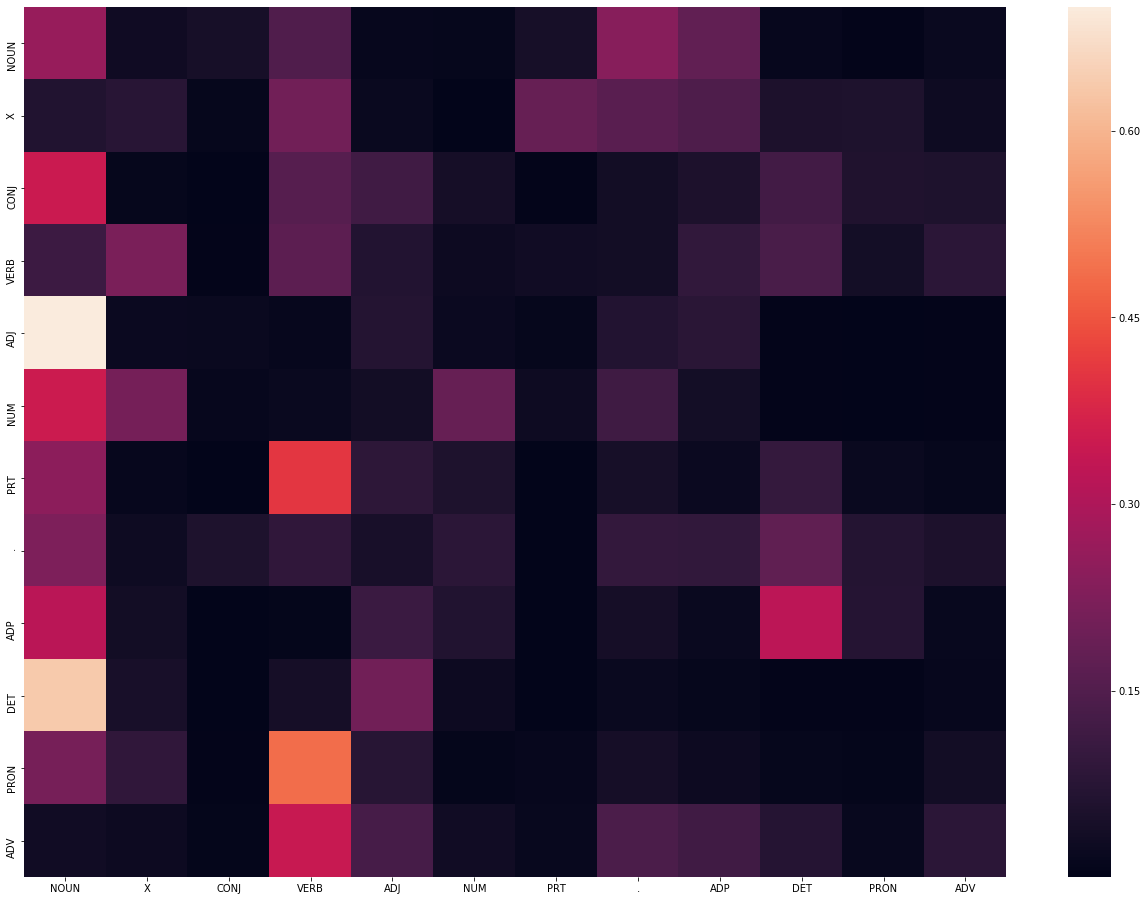

In [37]:
# heatmap of the tags matrix
# total_tags(i,j) means P(tag j given tag i)
plt.figure(figsize = (22, 16))
sns.heatmap(tags_df)
plt.show()

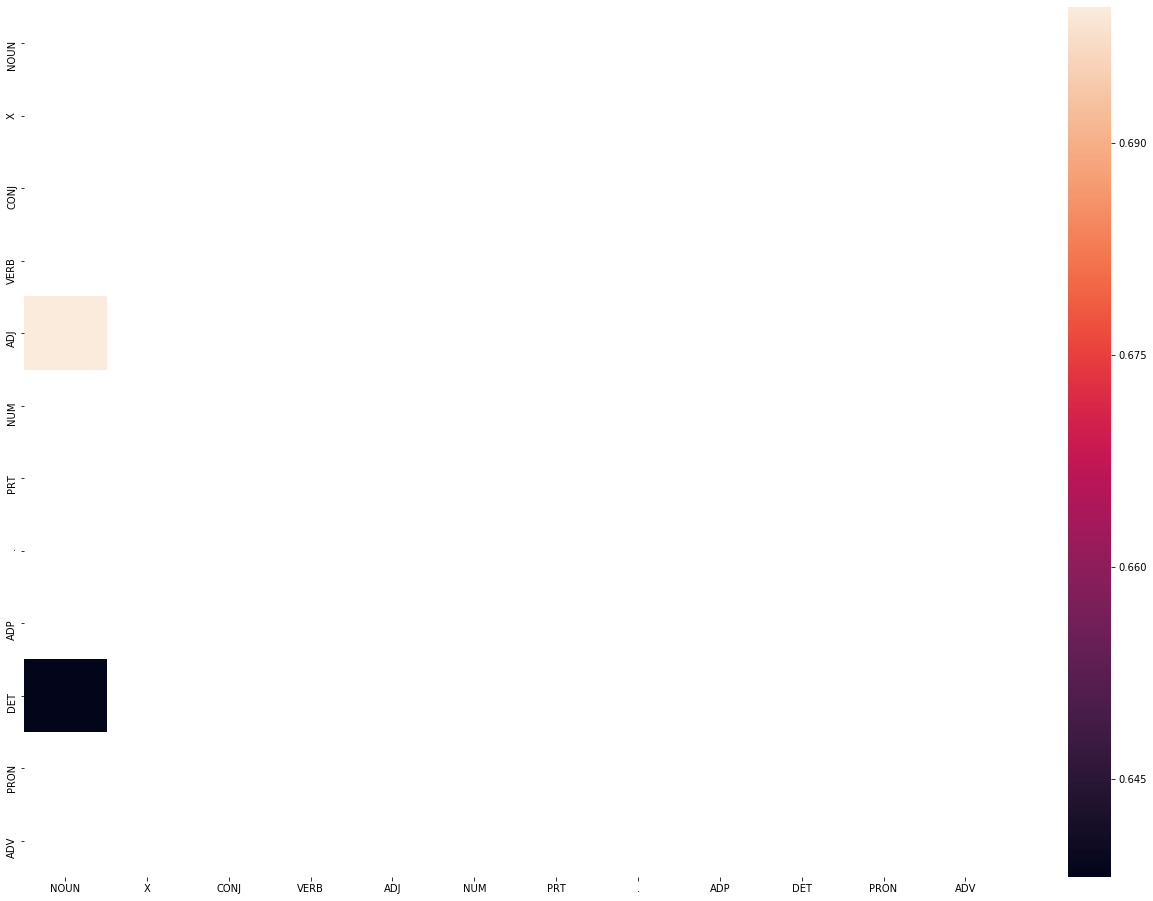

In [38]:
# frequent tags
# filtering the DataFrame to get (t2, t1)>0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize = (22, 16))
sns.heatmap(tags_frequent)
plt.show()

<font color=red> *The above heat map shows that NOUN followed by an ADJECTIVE has significantly higher probability.*</font>

### Build the vanilla Viterbi based POS tagger

Let's now use the computed probabilities P(w, tag) and P(t2, t1) to assign tags to each word in the document. We'll run through each word w and compute P(tag/w)=P(w/tag).P(tag) for each tag in the tag set, and then assign the tag having the max P(tag/w).

We'll store the assigned tags in a list of tuples, similar to the list 'train_tagged_words'. Each tuple will be a (token, assigned_tag). As we progress further in the list, each tag to be assigned will use the tag of the previous token.

Note: P(tag|start) = P(tag|'.')

In [39]:
len(train_tagged_words)

95547

In [40]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    total_tags = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        # initialise the list of probability of column for a given observation
        p = []
        for tag in total_tags:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # Compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for wich probability is maximum
        state_max = total_tags[p.index(pmax)]
        state.append(state_max)
    return list(zip(words, state))

In [41]:
# Running on entire test dataset would take more than 3-4 hours.
# Let's test our Viterbi algorithm on a few sample sentences of the test test dataset

random.seed(1234)

# Choose random 5 sentences
random_sents = [random.randint(1, len(test_set)) for x in range(5)]

# list of sentences
test_run = [test_set[i] for i in random_sents]

# list of tagged words
test_tagged_words = [tup for sent in test_run for tup in sent]

# list of untagged words
test_untagged_words = [tup[0] for sent in test_run for tup in sent]

In [42]:
# tagging the test sentences
start_1 = time.time()
tagged_seq_vanilla_viterbi = Viterbi(test_untagged_words)
end_1 = time.time()
difference_1 = end_1-start_1

In [43]:
print("Time taken in seconds: ", difference_1)
print(tagged_seq_vanilla_viterbi)

Time taken in seconds:  16.33037781715393
[('The', 'DET'), ('Contra', 'NOUN'), ('military', 'ADJ'), ('command', 'VERB'), (',', '.'), ('in', 'ADP'), ('a', 'DET'), ('statement', 'NOUN'), ('from', 'ADP'), ('Honduras', 'NOUN'), (',', '.'), ('said', 'VERB'), ('0', 'X'), ('Sandinista', 'NOUN'), ('troops', 'NOUN'), ('had', 'VERB'), ('launched', 'VERB'), ('a', 'DET'), ('major', 'ADJ'), ('offensive', 'NOUN'), ('against', 'ADP'), ('the', 'DET'), ('rebel', 'NOUN'), ('forces', 'NOUN'), ('.', '.'), ('*-1', 'X'), ('Bucking', 'NOUN'), ('the', 'DET'), ('market', 'NOUN'), ('trend', 'NOUN'), (',', '.'), ('an', 'DET'), ('issue', 'NOUN'), ('of', 'ADP'), ('$', '.'), ('130', 'NUM'), ('million', 'NUM'), ('*U*', 'X'), ('general', 'ADJ'), ('obligation', 'NOUN'), ('distributable', 'ADJ'), ('state', 'NOUN'), ('aid', 'NOUN'), ('bonds', 'NOUN'), ('from', 'ADP'), ('Detroit', 'NOUN'), (',', '.'), ('Mich.', 'NOUN'), (',', '.'), ('apparently', 'ADV'), ('drew', 'NOUN'), ('solid', 'ADJ'), ('investor', 'NOUN'), ('interes

In [44]:
# Accuracy
check  = [i for i, j in zip(tagged_seq_vanilla_viterbi, test_tagged_words) if i == j]
accuracy_vanilla_viterbi = len(check)/len(tagged_seq_vanilla_viterbi)
accuracy_vanilla_viterbi

0.9469026548672567

<font color=red>As we can see, we are getting an accuracy of 88.5% using the Vanilla Viterbi algorithm.</font>

### Solve the problem of unknown words

## Viterbi Modification-Technique 

In [45]:
# Using Unigram tagger and rule based taging
unigram_tagger = nltk.UnigramTagger(train_set)
unigram_tagger.evaluate(test_set)

0.906999415090661

In [46]:
# Building a Viterbi algorithm where unknown words are taken care by the rule based patterns
patterns = [
    (r'.*ing$', 'VERB'),              # gerund
    (r'.*ed$', 'VERB'),               # past tense 
    (r'.*es$', 'VERB'),               # verb    
    (r'.*\'s$', 'NOUN'),              # possessive nouns
    (r'.*s$', 'NOUN'),                # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'NUM'), # cardinal numbers
    (r'\*T?\*?-[0-9]+$', 'X'),        # X
    (r'.*', 'NOUN')]                  # Unknow words

In [47]:
regexp_tagger = nltk.RegexpTagger(patterns)

In [48]:
regexp_tagger.evaluate(test_set)

0.3751218561123026

In [49]:
# rule based tagger 
rule_based_tagger = nltk.RegexpTagger(patterns)

# Lexicon tagger as a backoff to rule based tagger in case of unknown words.
lexicon_tagger = nltk.UnigramTagger(train_set, backoff = rule_based_tagger)

lexicon_tagger.evaluate(test_set)

0.951452524858647

In [50]:
# Modified Viterbi Algorithm : backoff to rule based tagger in case an unknown word shows up.
def Viterbi_modified(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        state_max = rule_based_tagger.tag([word])[0][1]       
       
        
        if(pmax==0):
            state_max = rule_based_tagger.tag([word])[0][1] 
        else:
            if state_max != 'X':
                # getting state for which probability is maximum
                state_max = T[p.index(pmax)]                
            
        
        state.append(state_max)
    return list(zip(words, state))
        

In [51]:
# tagging the test sentences 
start_2 = time.time()
tagged_seq_vanilla_viterbi_modified = Viterbi_modified(test_untagged_words)
end_2 = time.time()
difference_2 = end_2 - start_2

In [52]:
print("Time taken in seconds: ", difference_2)
print(tagged_seq_vanilla_viterbi_modified)

Time taken in seconds:  15.41681957244873
[('The', 'DET'), ('Contra', 'NOUN'), ('military', 'ADJ'), ('command', 'VERB'), (',', '.'), ('in', 'ADP'), ('a', 'DET'), ('statement', 'NOUN'), ('from', 'ADP'), ('Honduras', 'NOUN'), (',', '.'), ('said', 'VERB'), ('0', 'X'), ('Sandinista', 'NOUN'), ('troops', 'NOUN'), ('had', 'VERB'), ('launched', 'VERB'), ('a', 'DET'), ('major', 'ADJ'), ('offensive', 'NOUN'), ('against', 'ADP'), ('the', 'DET'), ('rebel', 'NOUN'), ('forces', 'NOUN'), ('.', '.'), ('*-1', 'X'), ('Bucking', 'VERB'), ('the', 'DET'), ('market', 'NOUN'), ('trend', 'NOUN'), (',', '.'), ('an', 'DET'), ('issue', 'NOUN'), ('of', 'ADP'), ('$', '.'), ('130', 'NUM'), ('million', 'NUM'), ('*U*', 'X'), ('general', 'ADJ'), ('obligation', 'NOUN'), ('distributable', 'ADJ'), ('state', 'NOUN'), ('aid', 'NOUN'), ('bonds', 'NOUN'), ('from', 'ADP'), ('Detroit', 'NOUN'), (',', '.'), ('Mich.', 'NOUN'), (',', '.'), ('apparently', 'ADV'), ('drew', 'NOUN'), ('solid', 'ADJ'), ('investor', 'NOUN'), ('interes

In [53]:
# Accuracy of Modified Viterbi Algorithm
check = [i for i, j in zip(tagged_seq_vanilla_viterbi_modified, test_tagged_words) if i == j] 

accuracy_modified_viterbi = len(check)/len(tagged_seq_vanilla_viterbi_modified)

accuracy_modified_viterbi

0.9734513274336283

#### Evaluating tagging accuracy

In [55]:
file = open(r'Test_sentences.txt')
text = file.read()
test_sent = text.splitlines()
file.close()

In [56]:
test_sent

['Android is a mobile operating system developed by Google.',
 'Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.',
 "Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.",
 'Twitter is an online news and social networking service on which users post and interact with messages known as tweets.',
 'Before entering politics, Donald Trump was a domineering businessman and a television personality.',
 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.',
 'This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.',
 'Show me the cheapest round trips from Dallas to Atlanta',
 'I would like to see flights from Denver to Philadelphia.',
 'Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.',
 'NASA invited social media users to experienc

In [57]:
# Removing empty sentences at the end of the text 
test_sent.pop()
test_sent.pop()
test_sent.pop()

''

In [58]:
test_sent

['Android is a mobile operating system developed by Google.',
 'Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.',
 "Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.",
 'Twitter is an online news and social networking service on which users post and interact with messages known as tweets.',
 'Before entering politics, Donald Trump was a domineering businessman and a television personality.',
 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.',
 'This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.',
 'Show me the cheapest round trips from Dallas to Atlanta',
 'I would like to see flights from Denver to Philadelphia.',
 'Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.',
 'NASA invited social media users to experienc

In [59]:
sentence_test = ''
# list of untagged words
for sent in test_sent:
    sentence_test = str(sentence_test) +' '+str(sent)

In [60]:
sentence_test

" Android is a mobile operating system developed by Google. Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013. Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose. Twitter is an online news and social networking service on which users post and interact with messages known as tweets. Before entering politics, Donald Trump was a domineering businessman and a television personality. The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years. This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe. Show me the cheapest round trips from Dallas to Atlanta I would like to see flights from Denver to Philadelphia. Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco. NASA invited social media users to experience the launch of ICESAT-2 Satellite."

## Vanilla Viterbi

In [61]:
words = word_tokenize(sentence_test)

start = time.time()
tagged_seq = Viterbi(words)
end = time.time()
difference = end - start

In [62]:
print(difference)
print(tagged_seq)

25.68534517288208
[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'NOUN'), ('.', '.'), ('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'NOUN'), ('since', 'ADP'), ('2011', 'NOUN'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'NOUN'), ('.', '.'), ('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'NOUN'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'NOUN'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'NOUN'), ("'s", 'PRT'), ('firehose', 'NOUN'), ('.', '.'), ('Twitter', 'NOUN'), ('is', 'VERB'), ('an', 'DET'), ('online', 'NOUN'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN'), ('on', 'ADP')

## Modified Viterbi

In [63]:
words = word_tokenize(sentence_test)

start = time.time()
tagged_seq = Viterbi_modified(words)
end = time.time()
difference = end - start

In [64]:
print(difference)
print(tagged_seq)

24.417088508605957
[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'NOUN'), ('.', '.'), ('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'VERB'), ('since', 'ADP'), ('2011', 'NUM'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'NUM'), ('.', '.'), ('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'NUM'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'NOUN'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'NOUN'), ("'s", 'PRT'), ('firehose', 'NOUN'), ('.', '.'), ('Twitter', 'NOUN'), ('is', 'VERB'), ('an', 'DET'), ('online', 'NOUN'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN'), ('on', 'ADP'), 

### Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

In [ ]:
accuracy_vanilla_viterbi

In [ ]:
accuracy_modified_viterbi

### *Clearly, The modified Viterbi outperforms the regular Vanilla Viterbi with the accuracy of 97.3% as compared to the accuracy of 88.5%*

### List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

In [ ]:
incorrect_tagged_cases_vanilla_viterbi = [[test_tagged_words[i-1],j] for i, j in enumerate(zip(tagged_seq_vanilla_viterbi, test_tagged_words)) if j[0]!=j[1]]

In [ ]:
incorrect_tagged_cases_vanilla_viterbi

In [ ]:
len(incorrect_tagged_cases_vanilla_viterbi)

In [ ]:
incorrect_tagged_cases_modified_viterbi = [[test_tagged_words[i-1],j] for i, j in enumerate(zip(tagged_seq_vanilla_viterbi_modified, test_tagged_words)) if j[0]!=j[1]]

In [ ]:
incorrect_tagged_cases_modified_viterbi

In [ ]:
len(incorrect_tagged_cases_modified_viterbi)

## <font color=green>As per the above analysis, Although the Modified Viterbi is not perfect but still it has a higher chance of tagging words correctly than the reguar Viterbi.</font>